In [2]:
import pandas as pd
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()


## Load dataset

In [3]:
df = pd.read_csv('iris.data', names=['sepal_length','sepal_width','petal_length','petal_width','target'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Handling Missing values

### Checking NaN items in each Row of dataset

In [4]:
df.isna().sum(axis = 0)

sepal_length    2
sepal_width     0
petal_length    2
petal_width     3
target          3
dtype: int64

### Remove NaN items

In [5]:
df = df.dropna()
df.isna().sum(axis = 0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

all Nan items have been removed

## Target labeling 

In [6]:
df['target']= label_encoder.fit_transform(df['target']) 
for k, v in zip([0,1,2],label_encoder.inverse_transform([0, 1, 2])):
    print("{} --> {}".format(v, k))
df.head()

Iris-setosa --> 0
Iris-versicolor --> 1
Iris-virginica --> 2


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Normalization

### checking var and mean before normalization 

In [7]:
df.var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
target          0.671141
dtype: float64

In [8]:
df.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
target          1.000000
dtype: float64

### Var and mean after normalization

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_df = df.copy()
normalized_df[[ 'sepal_length',
                'sepal_width',
                'petal_length',
                'petal_width']] = scaler.fit_transform(normalized_df[['sepal_length', 'sepal_width', 'petal_length','petal_width']])

In [10]:
normalized_df.var()

sepal_length    1.006711
sepal_width     1.006711
petal_length    1.006711
petal_width     1.006711
target          0.671141
dtype: float64

In [11]:
normalized_df.mean()

sepal_length   -4.736952e-16
sepal_width    -6.631732e-16
petal_length    3.315866e-16
petal_width    -2.842171e-16
target          1.000000e+00
dtype: float64

## PCA

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df)
processed_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
processed_df['target'] = list(df.target)
processed_df

,PC1,PC2,target
0,-2.476965,0.500585,0
1,-2.313886,-0.659120,0
2,-2.567994,-0.324384,0
3,-2.509251,-0.580856,0
4,-2.588980,0.668663,0
...,...,...,...
145,2.118469,0.385062,2
146,1.835538,-0.904895,2
147,1.800721,0.266694,2
148,1.673850,1.014595,2


## Plotting dataset

In [13]:
import matplotlib.pyplot as plt
import numpy as np

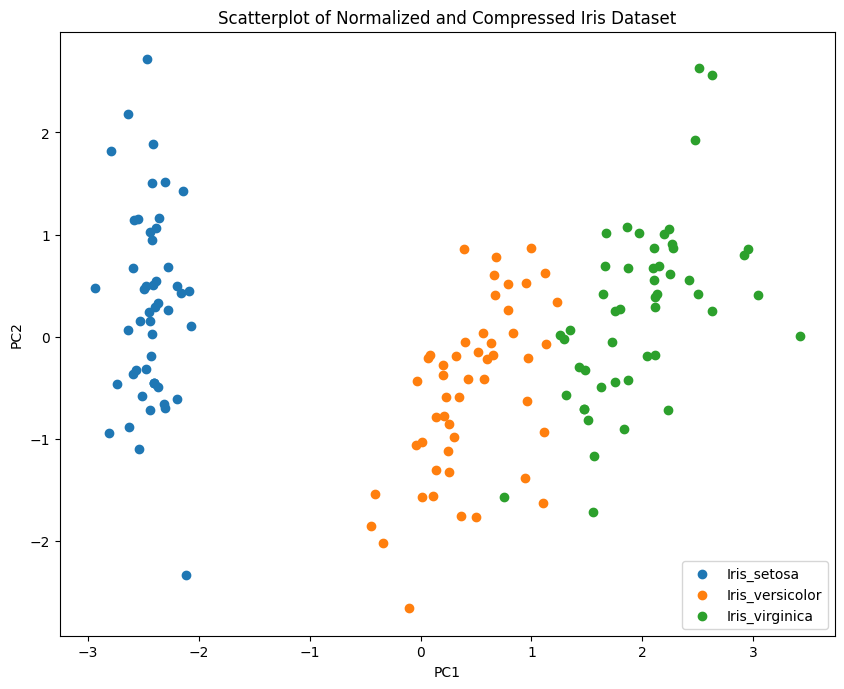

In [14]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Iris_setosa = processed_df[processed_df['target']==0]
Iris_versicolor = processed_df[processed_df['target']==1]
Iris_virginica = processed_df[processed_df['target']==2]


plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(Iris_setosa['PC1'],Iris_setosa['PC2'], label = 'Iris_setosa')
plt.scatter(Iris_versicolor['PC1'],Iris_versicolor['PC2'], label = 'Iris_versicolor')
plt.scatter(Iris_virginica['PC1'],Iris_virginica['PC2'], label = 'Iris_virginica')

# Plot
plt.title('Scatterplot of Normalized and Compressed Iris Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()




### Boxplot for normalized dataset

<AxesSubplot:>

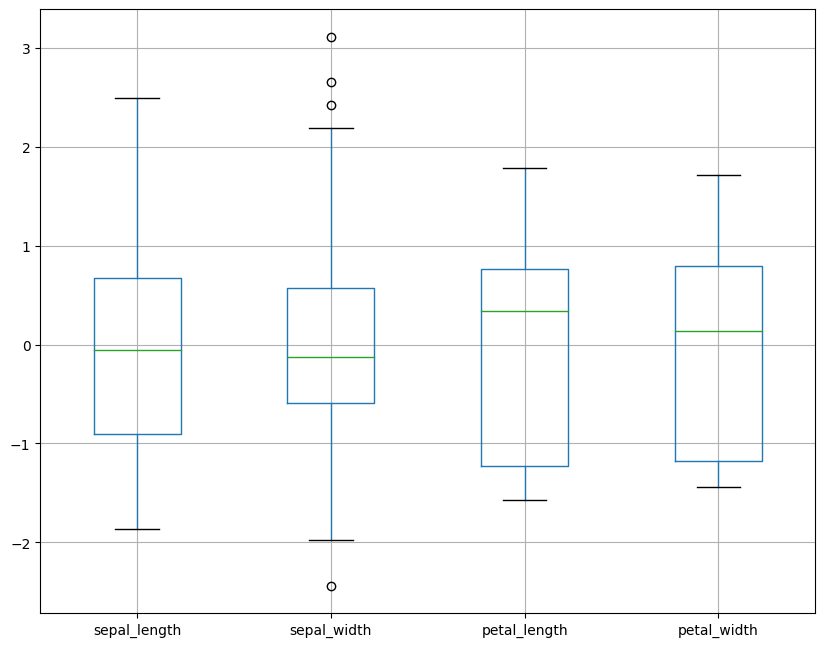

In [15]:
normalized_df.boxplot(column=['sepal_length', 'sepal_width', 'petal_length','petal_width'])

### Boxplot for raw dataset

<AxesSubplot:>

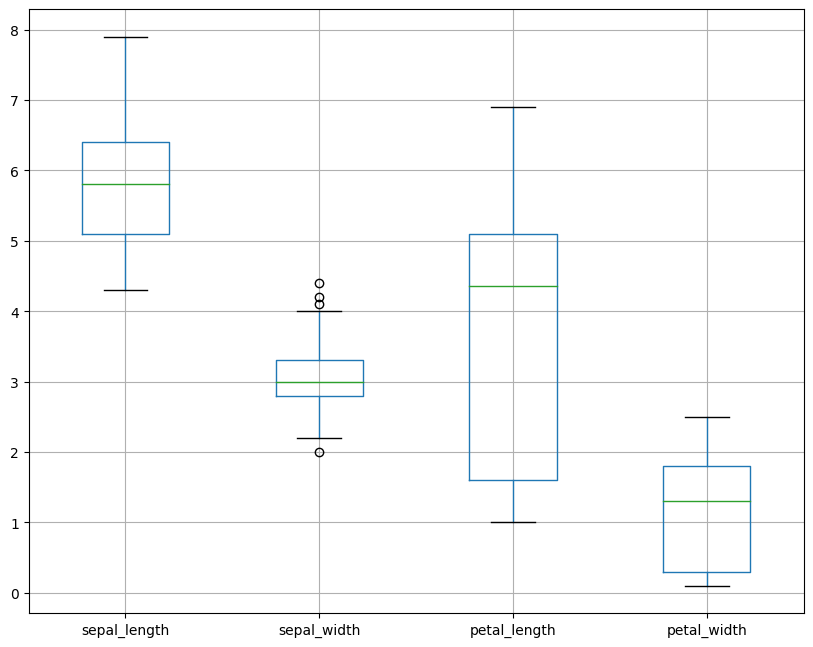

In [16]:
df.boxplot(column=['sepal_length', 'sepal_width', 'petal_length','petal_width'])